# **Author: Laaro Yussuf Olamilekan 👨‍💻**
- Email: yusuflaaro@gmail.com
- Github: https://github.com/Laaroyussuf
- Linkedin: https://www.linkedin.com/in/yussuf-laaro-8b0808194
- Twitter: https://twitter.com/laaro_yussuf

# US Accident Analysis
**This is a road accidents dataset of 49 states in the US (from 2016-2021). There are over 2.8 million accidents recorded in this dataset, keep scrolling to get the full details and analysis.**

### EXPLORATORY DATA ANALYSIS 📊
- **Location analysis**
- **Time analysis**
- **Road condition**
- **Weather condition**
- **Random Question and Answer on the above**
- **Insights / Conclusion**

# LOADING DATA...

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('US_Accidents_Dec21_updated.csv')
df.head(2)

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.10891,-83.09286,40.11206,-83.03187,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.86542,-84.06280,39.86501,-84.04873,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night


In [3]:
df.shape

(2845342, 47)

> Checking the percentage of missing data;

In [4]:
perc_missing = df.isnull().sum().sort_values(ascending=False) *100/ len(df)
perc_missing[perc_missing != 0]

Number                   61.290031
Precipitation(in)        19.310789
Wind_Chill(F)            16.505678
Wind_Speed(mph)           5.550967
Wind_Direction            2.592834
Humidity(%)               2.568830
Weather_Condition         2.482514
Visibility(mi)            2.479350
Temperature(F)            2.434646
Pressure(in)              2.080593
Weather_Timestamp         1.783125
Airport_Code              0.335601
Timezone                  0.128596
Nautical_Twilight         0.100761
Civil_Twilight            0.100761
Sunrise_Sunset            0.100761
Astronomical_Twilight     0.100761
Zipcode                   0.046356
City                      0.004815
Street                    0.000070
dtype: float64

> All columns in the dataset;

In [5]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

> Data informations;

In [6]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,1.101431e+06,2.776068e+06,2.375699e+06,2.772250e+06,2.786142e+06,2.774796e+06,2.687398e+06,2.295884e+06
mean,2.137572e+00,3.624520e+01,-9.711463e+01,3.624532e+01,-9.711439e+01,7.026779e-01,8.089408e+03,6.179356e+01,5.965823e+01,6.436545e+01,2.947234e+01,9.099391e+00,7.395044e+00,7.016940e-03
std,4.787216e-01,5.363797e+00,1.831782e+01,5.363873e+00,1.831763e+01,1.560361e+00,1.836009e+04,1.862263e+01,2.116097e+01,2.287457e+01,1.045286e+00,2.717546e+00,5.527454e+00,9.348831e-02
min,1.000000e+00,2.456603e+01,-1.245481e+02,2.456601e+01,-1.245457e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.344517e+01,-1.180331e+02,3.344628e+01,-1.180333e+02,5.200000e-02,1.270000e+03,5.000000e+01,4.600000e+01,4.800000e+01,2.931000e+01,1.000000e+01,3.500000e+00,0.000000e+00
50%,2.000000e+00,3.609861e+01,-9.241808e+01,3.609799e+01,-9.241772e+01,2.440000e-01,4.007000e+03,6.400000e+01,6.300000e+01,6.700000e+01,2.982000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.016024e+01,-8.037243e+01,4.016105e+01,-8.037338e+01,7.640000e-01,9.567000e+03,7.600000e+01,7.600000e+01,8.300000e+01,3.001000e+01,1.000000e+01,1.000000e+01,0.000000e+00
max,4.000000e+00,4.900058e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,1.551860e+02,9.999997e+06,1.960000e+02,1.960000e+02,1.000000e+02,5.890000e+01,1.400000e+02,1.087000e+03,2.400000e+01


**Columns to be analyze;**

In [8]:
columns_analyze = [
    'State',
    'City', 
    'Start_Time',
    'Start_Lat', 
    'Start_Lng',
    'Timezone',
    'Temperature(F)', 
    'Visibility(mi)', 
    'Weather_Condition', 
    'Junction',
    'Traffic_Signal',
    'Bump',
    'Roundabout',
    'Crossing',
    'Turning_Loop'
]

In [9]:
data = df[columns_analyze]

In [10]:
data.head()

,State,City,Start_Time,Start_Lat,Start_Lng,Timezone,Temperature(F),Visibility(mi),Weather_Condition,Junction,Traffic_Signal,Bump,Roundabout,Crossing,Turning_Loop
0,OH,Dublin,2016-02-08 00:37:08,40.108910,-83.092860,US/Eastern,42.1,10.0,Light Rain,False,False,False,False,False,False
1,OH,Dayton,2016-02-08 05:56:20,39.865420,-84.062800,US/Eastern,36.9,10.0,Light Rain,False,False,False,False,False,False
2,OH,Cincinnati,2016-02-08 06:15:39,39.102660,-84.524680,US/Eastern,36.0,10.0,Overcast,True,False,False,False,False,False
3,OH,Akron,2016-02-08 06:51:45,41.062130,-81.537840,US/Eastern,39.0,10.0,Overcast,False,False,False,False,False,False
4,OH,Cincinnati,2016-02-08 07:53:43,39.172393,-84.492792,US/Eastern,37.0,10.0,Light Rain,False,False,False,False,False,False


### LOCATIONS ANALYSIS

**City**

In [11]:
len(data.City.unique())

11682

In [12]:
city_accidents = data.City.value_counts()[:10]
city_accidents

Miami          106966
Los Angeles     68956
Orlando         54691
Dallas          41979
Houston         39448
Charlotte       33152
Sacramento      32559
San Diego       26627
Raleigh         22840
Minneapolis     22768
Name: City, dtype: int64

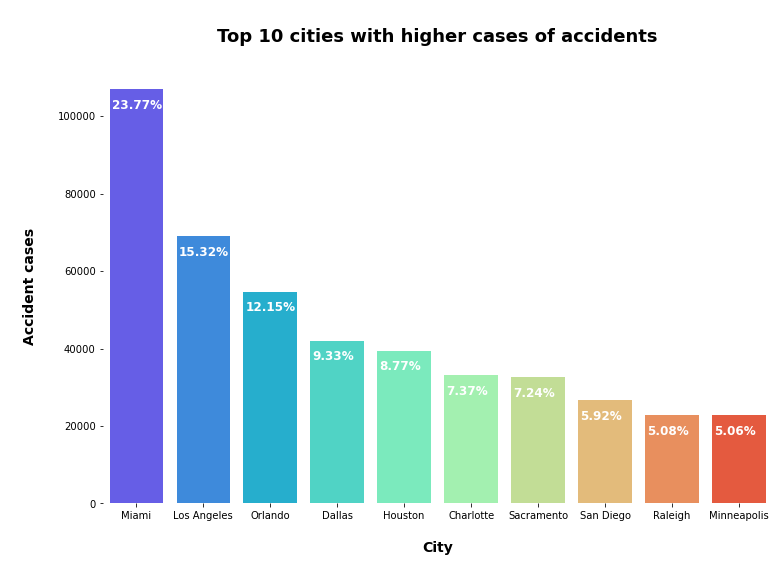

In [250]:
fig, ax = plt.subplots(figsize = (12,8))
total = sum(city_accidents)
plot = sns.barplot(y=city_accidents, x= city_accidents.index, palette='rainbow');
for i in ax.patches:
     ax.text(i.get_x()+.03, i.get_height()-5000, str(round((i.get_height()/total)*100, 2))+'%', fontsize=12, weight='bold',
                color='white')
# Removing the top, right, left, and bottom boundaries in the plot.        
for a in ['right' , 'left', 'top', 'bottom']:
    ax.spines[a].set_visible(False)
plt.xlabel('\nCity\n', fontsize=14, weight='bold')
plt.ylabel('\nAccident cases\n', fontsize=14, weight='bold')
plt.title('\nTop 10 cities with higher cases of accidents\n', fontsize=18, weight='bold')
plt.show();

The plot above make it known that Miami has the highest number of accidents (23.77%) so far among cities in US.

**State**

In [14]:
us_states = {'AK': 'Alaska','AL': 'Alabama','AR': 'Arkansas','AS': 'American Samoa','AZ': 'Arizona','CA': 'California',
 'CO': 'Colorado','CT': 'Connecticut','DC': 'District of Columbia','DE': 'Delaware','FL': 'Florida','GA': 'Georgia',
 'GU': 'Guam','HI': 'Hawaii','IA': 'Iowa','ID': 'Idaho','IL': 'Illinois','IN': 'Indiana','KS': 'Kansas','KY': 'Kentucky',
 'LA': 'Louisiana','MA': 'Massachusetts','MD': 'Maryland','ME': 'Maine','MI': 'Michigan','MN': 'Minnesota','MO': 'Missouri',
 'MP': 'Northern Mariana Islands','MS': 'Mississippi','MT': 'Montana','NC': 'North Carolina','ND': 'North Dakota',
 'NE': 'Nebraska','NH': 'New Hampshire','NJ': 'New Jersey','NM': 'New Mexico','NV': 'Nevada','NY': 'New York',
 'OH': 'Ohio','OK': 'Oklahoma','OR': 'Oregon','PA': 'Pennsylvania','PR': 'Puerto Rico','RI': 'Rhode Island',
 'SC': 'South Carolina','SD': 'South Dakota','TN': 'Tennessee','TX': 'Texas','UT': 'Utah','VA': 'Virginia','VI': 'Virgin Islands',
 'VT': 'Vermont','WA': 'Washington','WI': 'Wisconsin','WV': 'West Virginia','WY': 'Wyoming'}

In [17]:
# Transforming abbreviation of each state to their full form
def state_full(data):
    for key, full in us_states.items():
        for value in data['State'].unique():
            if value == key:
                data.State.mask(data.State==value, other = full, inplace=True)            

In [18]:
state_full(data=data)

In [19]:
data.State.value_counts()[:10]

California        795868
Florida           401388
Texas             149037
Oregon            126341
Virginia          113535
New York          108049
Pennsylvania       99975
Minnesota          97185
North Carolina     91362
South Carolina     89216
Name: State, dtype: int64

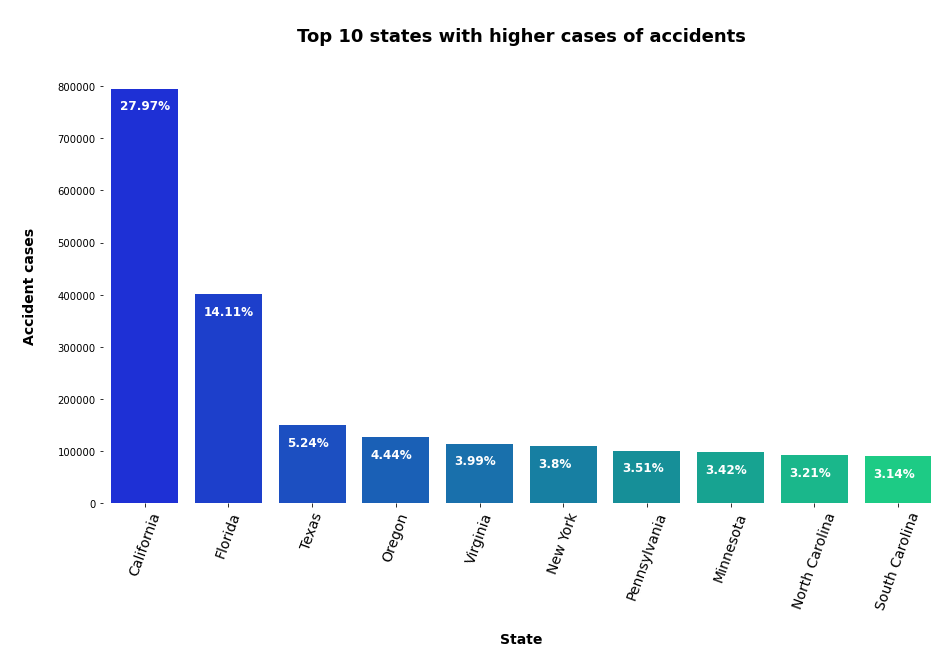

In [20]:
fig, ax = plt.subplots(figsize=(15,8))
state_count = data.State.value_counts()[:10]
sns.barplot(x=state_count.index, y = state_count, palette='winter')
total = sum(data.State.value_counts())
for i in ax.patches:
     ax.text(i.get_x()+0.1, i.get_height()-40000,str(round((i.get_height()/total)*100, 2))+'%', fontsize=12, weight='bold',
                color='white')
for a in ['right' , 'left', 'top', 'bottom']:
    ax.spines[a].set_visible(False)
plt.xticks(rotation=70, fontsize=14)
plt.xlabel('\nState\n', fontsize=14, weight='bold')
plt.ylabel('\nAccident cases\n', fontsize=14, weight='bold')
plt.title('\nTop 10 states with higher cases of accidents\n', fontsize=18, weight='bold')
plt.show();

California has the highest number of accidents among the states in US.

**Start Latitude & Longitude**

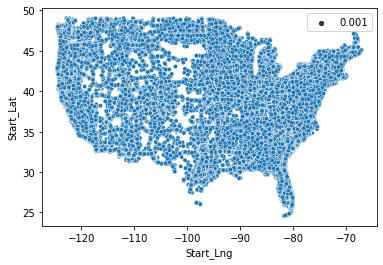

In [21]:
sns.scatterplot(y=data.Start_Lat, x=data.Start_Lng, size=0.001);

Number of accidents is enormous at area with higher latitude and smaller longitude.

**In California;**

California accidents per year;

In [22]:
total_cal = data[data.State=='California']['State'].count()
yearly_acc_cal = total_cal//5
yearly_acc_cal

159173

California accidents per day;

In [23]:
daily_acc_cal = yearly_acc_cal//365
daily_acc_cal

436

California accidents per hour;

In [24]:
hour_acc_cal = daily_acc_cal//24
hour_acc_cal

18

### Time Analysis

**Timezone**

In [25]:
timezone = data.Timezone.value_counts()

In [65]:
def plot_label(data,boundaries, xlabel,ylabel,plot_title, xtext_pos, ytext_pos, palette, text_color, label_rotation):
    total_acc = sum(data)
    fig, ax = plt.subplots(figsize=(15,8))
    sns.barplot(x=data.index, y= data, palette=palette);
    for i in ax.patches:
        ax.text(i.get_x()+xtext_pos, i.get_height()+ytext_pos, str(round((i.get_height()/total_acc)*100, 2))+'%', 
                fontsize = 12, weight= 'bold', color=text_color)
    if not boundaries:
        for a in ['right' , 'left', 'top', 'bottom']:
            ax.spines[a].set_visible(False)
    if label_rotation:
        plt.xticks(rotation=70)

    plt.xticks(fontsize=14)
    plt.xlabel(f'\n{xlabel}\n', fontsize=14, weight='bold')
    plt.ylabel(f'\n{ylabel}\n', fontsize=14, weight='bold')
    plt.title(f'\n{plot_title}\n', fontsize=18, weight='bold')
    plt.show();

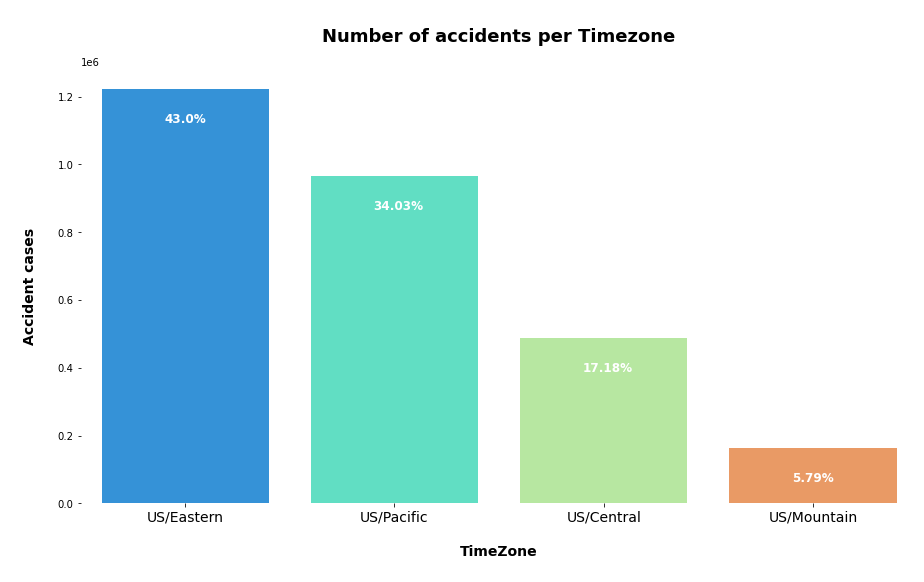

In [66]:
plot_label(data=timezone, boundaries=False, xlabel='TimeZone', ylabel='Accident cases', 
                   plot_title='Number of accidents per Timezone',
                   xtext_pos= .3, ytext_pos=-100000, palette='rainbow', text_color='white', label_rotation=False)

There's a high percentage of accident cases in Eastern timezone.

**Start_Time**

In [28]:
data.Start_Time

0          2016-02-08 00:37:08
1          2016-02-08 05:56:20
2          2016-02-08 06:15:39
3          2016-02-08 06:51:45
4          2016-02-08 07:53:43
                  ...         
2845337    2019-08-23 18:03:25
2845338    2019-08-23 19:11:30
2845339    2019-08-23 19:00:21
2845340    2019-08-23 19:00:21
2845341    2019-08-23 18:52:06
Name: Start_Time, Length: 2845342, dtype: object

In [29]:
start_time = pd.to_datetime(data.Start_Time)

In [30]:
start_time

0         2016-02-08 00:37:08
1         2016-02-08 05:56:20
2         2016-02-08 06:15:39
3         2016-02-08 06:51:45
4         2016-02-08 07:53:43
                  ...        
2845337   2019-08-23 18:03:25
2845338   2019-08-23 19:11:30
2845339   2019-08-23 19:00:21
2845340   2019-08-23 19:00:21
2845341   2019-08-23 18:52:06
Name: Start_Time, Length: 2845342, dtype: datetime64[ns]

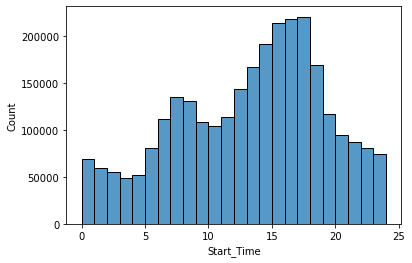

In [31]:
sns.histplot(start_time.dt.hour, bins=np.arange(25));

The number of accidents is very high around 3pm-7pm (extremely high at 6pm, probably because of people rushing down home after work).

Other than the above time range, there is a high number of accident between 7am-9am (Within this time range is also refer to as rush-hour, as people will be rushing down to their respective workplace).

**Day of the week;**

- 0 represents Monday
- 1 represents Tuesday
- 2 represents Wednesday
- 3 represents Thursday
- 4 represents Friday
- 5 represents Saturday
- 6 represents Sunday

In [32]:
start_time.dt.dayofweek

0          0
1          0
2          0
3          0
4          0
          ..
2845337    4
2845338    4
2845339    4
2845340    4
2845341    4
Name: Start_Time, Length: 2845342, dtype: int64

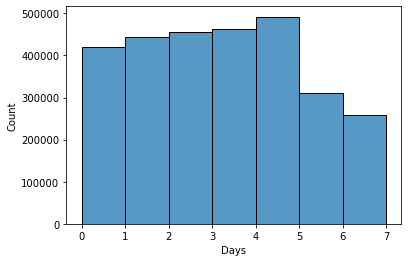

In [33]:
sns.histplot(start_time.dt.dayofweek, bins=np.arange(8));
plt.xlabel('Days');

This is to show that, there are more accident during the weekdays compare to weekend. There's a gradual increment in number of the accident per day (through the workingdays) in which the peak is on Friday as it is the last day of the working days (probably due to how intense work could get through the week).

There's a lower number of accident during weekends compare to working days. A lot of people will be resting at home and probably, lesser number of people will be on the road.

**Let's check out the rate in each months;**

In [46]:
start_time.dt.month.value_counts().index

Int64Index([12, 11, 10, 9, 6, 1, 2, 5, 8, 4, 7, 3], dtype='int64')

In [51]:
monthly_rate = start_time.dt.month.to_frame()
month = {1:'January',2:'February', 3:'March', 4:'April', 5:'May', 6:'June', 7:'July', 8:'August', 
         9:'September', 10:'October', 11:'November', 12:'December'}
def state_full(data, data_mod):
    for key, full in data_mod.items():
        for value in data['Start_Time'].unique():
            if value == key:
                data.mask(data==value, other = full, inplace=True)
state_full(monthly_rate,month)

In [54]:
monthly_rate = monthly_rate['Start_Time'].value_counts()

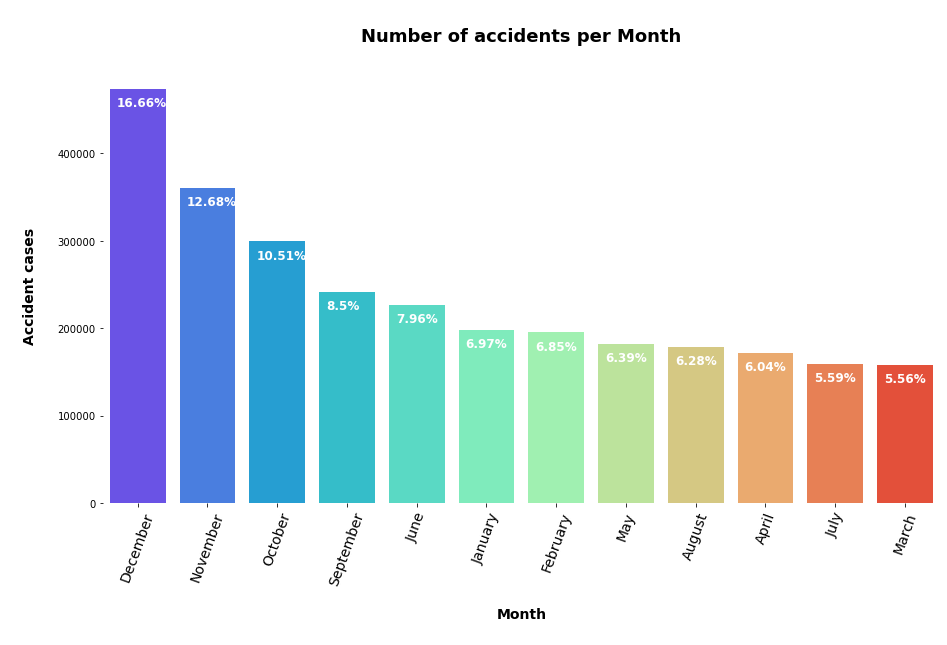

In [70]:
plot_label(data=monthly_rate, boundaries=False, xlabel='Month', ylabel='Accident cases', 
                   plot_title='Number of accidents per Month',
                   xtext_pos= .1, ytext_pos=-20000, palette='rainbow', 
                   text_color='white', label_rotation=True)

The number of accidents happened in December is extremely large compare to other months. 

**Time of accidents on Friday;**

In [71]:
time_friday = start_time[start_time.dt.dayofweek == 4].dt.hour

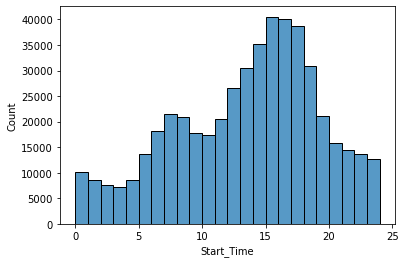

In [72]:
sns.histplot(time_friday, bins=np.arange(25));

The number of accidents on Friday is at the peak between 3pm-6pm and that is mostly the time people left work to rest for the week.

### Road Condition Analysis

**Temperature**

In [76]:
temp = data['Temperature(F)'].value_counts(normalize=True)

In [77]:
temp

 73.0     2.323610e-02
 77.0     2.290110e-02
 75.0     2.180566e-02
 72.0     2.149839e-02
 68.0     2.109350e-02
              ...     
 109.8    3.602217e-07
-9.8      3.602217e-07
 170.6    3.602217e-07
 107.2    3.602217e-07
 99.1     3.602217e-07
Name: Temperature(F), Length: 788, dtype: float64

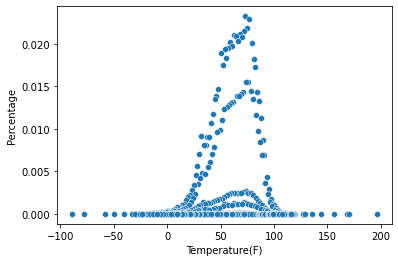

In [78]:
sns.scatterplot(y=temp, x=temp.index);
plt.ylabel('Percentage')
plt.xlabel('Temperature(F)');

There are more accidents between 30F-100F (highest at over 70F). Temperature between the range is still endurable by human at least from 50F to 100F but as the temperature increases or decreases, it becomes more uncomfortable which might even cause some accidents but if the decrement or increamnet gotten worse, many people will be home which as a result limit the number of people on the road.

A lot of people will be on the road at the endurable range of temperature.

**Visibility**

In [79]:
visib = data['Visibility(mi)'].value_counts()

In [80]:
visib.sort_values(ascending=False)

10.0     2230276
7.0        79649
9.0        68817
8.0        55955
5.0        53933
          ...   
110.0          1
34.0           1
16.0           1
54.0           1
19.0           1
Name: Visibility(mi), Length: 76, dtype: int64

The effects of visibility on the number of accidents is not Linear but the area with higher (large) visibility value tend to have low number of accidents.

**Junction**

In [81]:
data.Junction.value_counts()

False    2554837
True      290505
Name: Junction, dtype: int64

As traffic light is more common in most junctions now that's controlling the motion of people, the influence of Junctions on accidents rate is limited. 

**Weather**

In [82]:
weather= data.Weather_Condition.value_counts()

In [83]:
weather

Fair                        1107194
Mostly Cloudy                363959
Cloudy                       348767
Partly Cloudy                249939
Clear                        173823
                             ...   
Sleet / Windy                     1
Mist / Windy                      1
Blowing Sand                      1
Heavy Freezing Rain               1
Thunder and Hail / Windy          1
Name: Weather_Condition, Length: 127, dtype: int64

Fair-Weather means moderate weather; suitable for outdoor activities. From the analysis, it can be seen that, there are more accidents in Fair-Weather as there are many people outside working or on the road.

So, we can also conclude that the number of people on the road depend on the weather condition and accident cases is linearly dependent on the number of people on the road.

**BUMPS ON THE ROAD**

In [248]:
data.Bump.value_counts(normalize=True)*100

False    99.964117
True      0.035883
Name: Bump, dtype: float64

This shows; Area with bumps have a lower rate of accidents as its work is to limit speed.

**Traffic Signal**

In [85]:
data.Traffic_Signal.value_counts()

False    2580079
True      265263
Name: Traffic_Signal, dtype: int64

There are less accident in an area with traffic signal.

# **Random Question and Answer**

**Q: Number of accidents that happened yearly at Miami?**

In [86]:
yearly_acc = city_accidents['Miami']//5
yearly_acc

21393

The amount of accident that happened yearly at Miami is 21393, for the past 5 years (2016-2021).

**Q: Estimate of accidents that happened daily in Miami as it is the city with the highest accidents cases.**

In [87]:
daily_acc = yearly_acc//365
daily_acc

58

In 24 hours in Miami, there are 58 cases of accidents on average.

**Q: Cities with only one record of accidents from 2016-2021**

In [88]:
num_acc = data.City.value_counts()
num_acc[num_acc==1]

Carney                          1
Waverly Hall                    1
Center Sandwich                 1
Glen Flora                      1
Sulphur Springs                 1
                               ..
Ridgedale                       1
Sekiu                           1
Wooldridge                      1
Bullock                         1
American Fork-Pleasant Grove    1
Name: City, Length: 1110, dtype: int64

In [89]:
len(num_acc[num_acc==1])

1110

There are 1110 cities that only recorded 1 accidents.

**Q: Are there more accidents in warmer or colder areas?**

In [90]:
temp.sort_values(ascending=False)

 73.0     2.323610e-02
 77.0     2.290110e-02
 75.0     2.180566e-02
 72.0     2.149839e-02
 68.0     2.109350e-02
              ...     
-2.4      3.602217e-07
 168.8    3.602217e-07
-1.5      3.602217e-07
-12.1     3.602217e-07
 99.1     3.602217e-07
Name: Temperature(F), Length: 788, dtype: float64

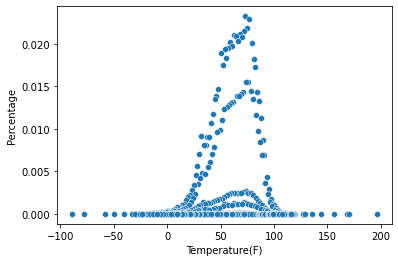

In [91]:
sns.scatterplot(y=temp, x=temp.index);
plt.ylabel('Percentage')
plt.xlabel('Temperature(F)');

The temperature that human can survive is 39.2-108.14F according to study, there are more accidents at the area with higher but not too extreme temperature as there will be more people on the road.

The rate of accidents decreases as the areas getting more colder or hotter. When this temperature is reach, many people will be home or at a place regulating the temperature indoor.

**Q: Which 5 states have the highest number of accidents? How about per capita?**

In [93]:
data.State.value_counts(ascending=False).head()

California    795868
Florida       401388
Texas         149037
Oregon        126341
Virginia      113535
Name: State, dtype: int64

Above are the first 5 state with the highest number of accidents in US.

Number of accidents in a state per capital;

In [94]:
def state_per_capital(data, capitals):
    state = data.groupby('State')['City'].value_counts()
    rate_acc = {}
    for key, value in capitals.items():
        rate_acc[key] = state[key][value]
    sort_rate = {k:v for k,v in sorted(rate_acc.items(), key=lambda value: value[1], reverse=True)}
    for k, v in sort_rate.items():
        print(f"{k} : {v}")

In [95]:
first_5capitals = {'California':'Sacramento', 'Florida':'Tallahassee', 
                   'Texas':'Austin', 'Oregon':'Salem','Virginia':'Richmond' }
state_per_capital(data=data, capitals=first_5capitals)

California : 32559
Texas : 17928
Virginia : 11990
Oregon : 3611
Florida : 3327


CA has the highest number of accidents in its capital and also top the list of first five state with highest number of accidents.

**Q: Does New York show up in the data? If yes, why is the count lower if this the most populated city.**

In [96]:
for ind, value in data['City'].iteritems():
    if value == 'New York':
        print('YES')
        break

YES


There are New York data in the dataset, good!

In [97]:
data[data.City == 'New York']['City'].value_counts()

New York    7068
Name: City, dtype: int64

There are 7068 accidents recorded in NY.

Despite being the most poplated City in US, why does the count of accidents lower there?

In [98]:
ny_data = data[data.City == 'New York']

In [99]:
ny_data.columns

Index(['State', 'City', 'Start_Time', 'Start_Lat', 'Start_Lng', 'Timezone',
       'Temperature(F)', 'Visibility(mi)', 'Weather_Condition', 'Junction',
       'Traffic_Signal', 'Bump', 'Roundabout', 'Crossing', 'Turning_Loop'],
      dtype='object')

In [104]:
ny_data['Junction'].value_counts()

False    5437
True     1631
Name: Junction, dtype: int64

One of the discovered reasons is, there are less junction in New York which also play a bigger role in causing an accident.

**Q: Among the top 100 cities in number of accidents, which states do they belong to most frequently.**

In [124]:
data.City.value_counts().head(100)

Miami          106966
Los Angeles     68956
Orlando         54691
Dallas          41979
Houston         39448
                ...  
Norwalk          3950
Birmingham       3925
Fremont          3924
Fairfax          3898
Colton           3824
Name: City, Length: 100, dtype: int64

In [232]:
first100_statecity = data.groupby('State')['City'].value_counts().sort_values(ascending=False).rename('Count').head(10)
first100 = first100_statecity.to_frame().sort_values(by='Count', ascending=False)

In [233]:
first100.reset_index()['State'].value_counts(ascending=False)

California        3
Florida           2
Texas             2
North Carolina    2
Minnesota         1
Name: State, dtype: int64

State with the frequent number of state.

**Q: What is the daily number of accidents per year?**

In [110]:
year_accident = start_time.dt.year.value_counts()
daily_acc_per_year = year_accident//(365)

In [111]:
def accidents_per_time(data,boundaries, xlabel,ylabel,plot_title, xtext_pos, ytext_pos):
    fig, ax = plt.subplots(figsize=(10,5))
    sns.barplot(x=data.index, y= data, palette='spring');
    for i in ax.patches:
        ax.text(i.get_x()+xtext_pos, i.get_height()+ytext_pos, str(int(i.get_height())), fontsize = 12, weight= 'bold', color='black')
    if not boundaries:
        for a in ['right' , 'left', 'top', 'bottom']:
            ax.spines[a].set_visible(False)

    plt.xticks(rotation=0, fontsize=14)
    plt.xlabel(f'\n{xlabel}\n', fontsize=14, weight='bold')
    plt.ylabel(f'\n{ylabel}\n', fontsize=14, weight='bold')
    plt.title(f'\n{plot_title}\n', fontsize=18, weight='bold')
    plt.show();

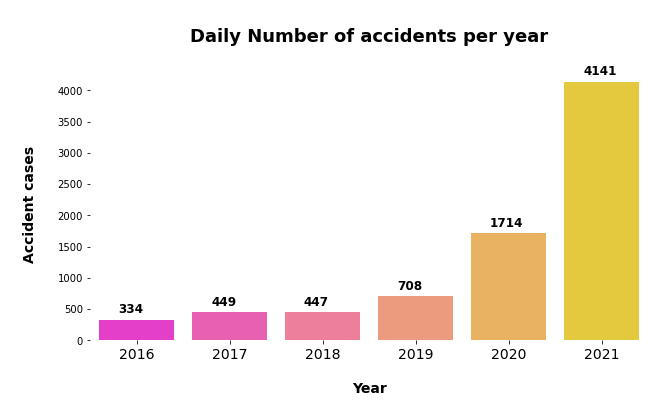

In [112]:
accidents_per_time(data=daily_acc_per_year, boundaries=False, 
                   xlabel='Year', ylabel='Accident cases', plot_title='Daily Number of accidents per year', 
                   xtext_pos= .2, ytext_pos=100)

There are 4141 accidents cases happening daily in 2021!

**Q: What is the number of accidents per hour in  each year?**

In [113]:
acc_per_hour = daily_acc_per_year//24
acc_per_hour

2021    172
2020     71
2019     29
2017     18
2018     18
2016     13
Name: Start_Time, dtype: int64

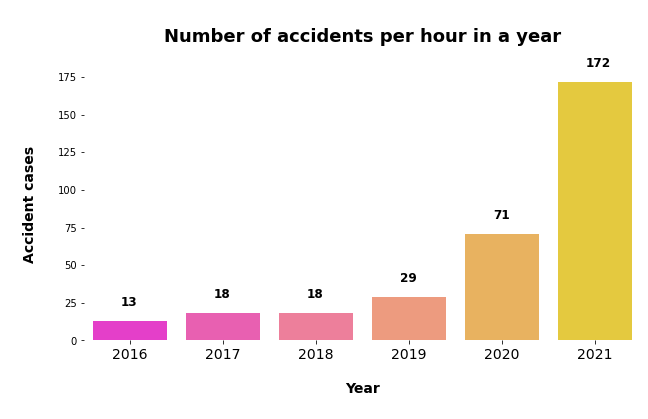

In [114]:
accidents_per_time(data=acc_per_hour, boundaries=False, xlabel='Year', ylabel='Accident cases', 
                   plot_title='Number of accidents per hour in a year',
                   xtext_pos= .3, ytext_pos=10)

**Q: Which days of the week have the most accidents?**

In [245]:
start_time.dt.dayofweek.value_counts(normalize=True)*100

4    17.294019
3    16.288973
2    15.992348
1    15.603326
0    14.754676
5    10.954430
6     9.112226
Name: Start_Time, dtype: float64

4 represents Friday, i.e., there are more accidents on Friday.

**Q: Which months have the most accidents?**

In [246]:
monthly_rate*100/(data.shape[0])

December     16.656803
November     12.676719
October      10.513007
September     8.498873
June          7.962523
January       6.971570
February      6.853130
May           6.394451
August        6.279386
April         6.040750
July          5.591982
March         5.560808
Name: Start_Time, dtype: float64

December has the highest case of accidents.

**Q: What is the trend of accidents year over year (decreasing/increasing?)**

In [237]:
year_accident = start_time.dt.year.value_counts(normalize=True)*100
year_accident

2021    53.130520
2020    21.996090
2019     9.089066
2017     5.760924
2018     5.734847
2016     4.288553
Name: Start_Time, dtype: float64

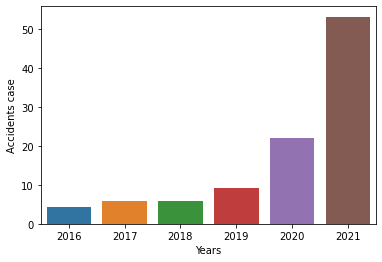

In [238]:
sns.barplot(x=year_accident.index, y=year_accident);
plt.xlabel('Years')
plt.ylabel('Accidents case');

From the figure above, we could notice that the cases of accidents have increased drastically over years. We can conclude from the figure above that, accidents cases is increasing with years.

53.13% of the recorded accidents happened in 2021. 

**Q: When is accidents per unit of traffic the highest.**

In [235]:
data.Traffic_Signal.value_counts(normalize=True)*100

False    90.677289
True      9.322711
Name: Traffic_Signal, dtype: float64

Accidents case is at the peak at an area with no traffic signal.

**Q: Top 10 Cities with highest number of bumps**

In [159]:
city_bump = data.groupby('City')['Bump'].value_counts()
city_bump = city_bump[city_bump.index.get_level_values('Bump') ==True].rename('Count').reset_index()

In [164]:
city_bump = city_bump.sort_values(by='Count', ascending=False)
city_bump = city_bump.head(10)

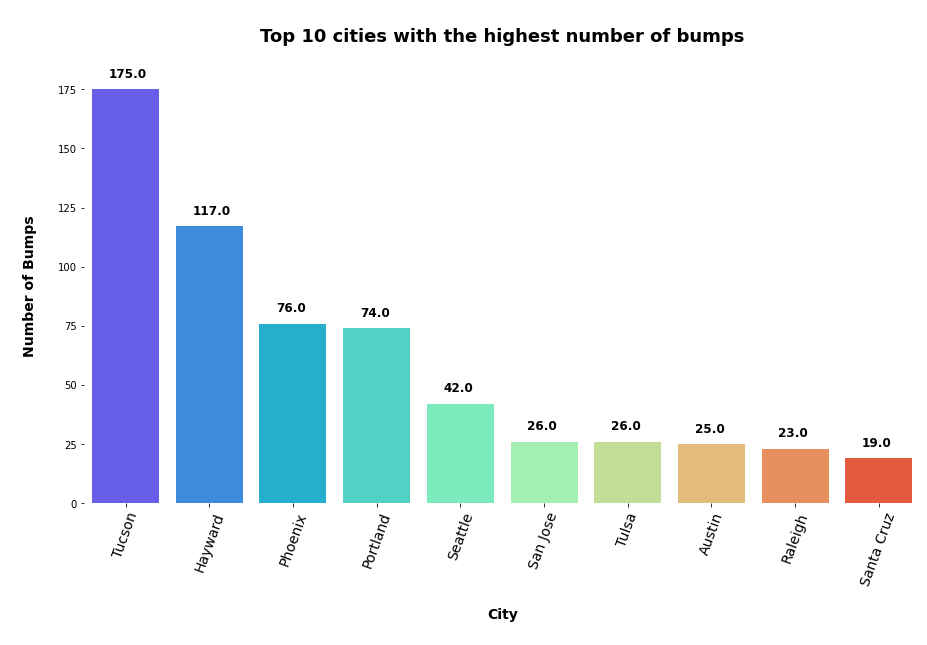

In [194]:
fig, ax = plt.subplots(figsize=(15,8))
sns.barplot(x=city_bump.City, y=city_bump.Count, palette='rainbow');    
for i in ax.patches:
    ax.text(i.get_x()+.2, i.get_height()+5, str(i.get_height()), 
            fontsize = 12, weight= 'bold', color='black')
for a in ['right' , 'left', 'top', 'bottom']:
    ax.spines[a].set_visible(False)

plt.xticks(rotation=70, fontsize=14)
plt.xlabel(f'\nCity\n', fontsize=14, weight='bold')
plt.ylabel(f'\nNumber of Bumps\n', fontsize=14, weight='bold')
plt.title(f'\nTop 10 cities with the highest number of bumps\n', fontsize=18, weight='bold')
plt.show();

> Comparing the above with the accident cases in the cities in question;

In [191]:
top_city_bump = city_bump.City.to_list()
acc_case = []
for city in top_city_bump:
    counts = data[data.City==city]['City'].value_counts()
    for ind, count in counts.iteritems():
         acc_case.append(count)

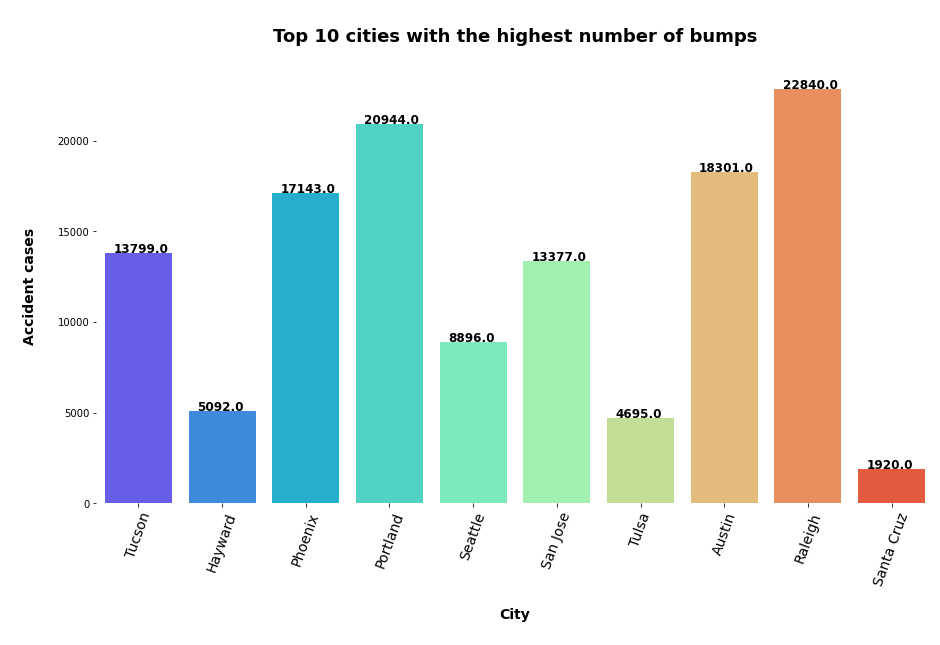

In [197]:
fig, ax = plt.subplots(figsize=(15,8))
sns.barplot(x=top_city_bump, y=acc_case, palette='rainbow');    
for i in ax.patches:
    ax.text(i.get_x()+.1, i.get_height()+5, str(i.get_height()), 
            fontsize = 12, weight= 'bold', color='black')
for a in ['right' , 'left', 'top', 'bottom']:
    ax.spines[a].set_visible(False)

plt.xticks(rotation=70, fontsize=14)
plt.xlabel(f'\nCity\n', fontsize=14, weight='bold')
plt.ylabel(f'\nAccident cases\n', fontsize=14, weight='bold')
plt.title(f'\nTop 10 cities with the highest number of bumps\n', fontsize=18, weight='bold')
plt.show();

By comparing the two figure above, the relationship between Bumps and Accident cases is not linear but existence of bumps do reduces accident cases. 

Miami has the highest number of accidents case but it's not among the top 20 cities with highest number of bumps; meaning, there's a lesser number of bumps at the city but relatively high accident cases.

> Cities with the lowest number of bumps;

In [206]:
city_bump = data.groupby('City')['Bump'].value_counts()
city_bump = city_bump[city_bump.index.get_level_values('Bump') ==False].rename('Count').reset_index()
city_bump = city_bump.sort_values(by='Count', ascending=False)
city_nobump = city_bump.head(10)

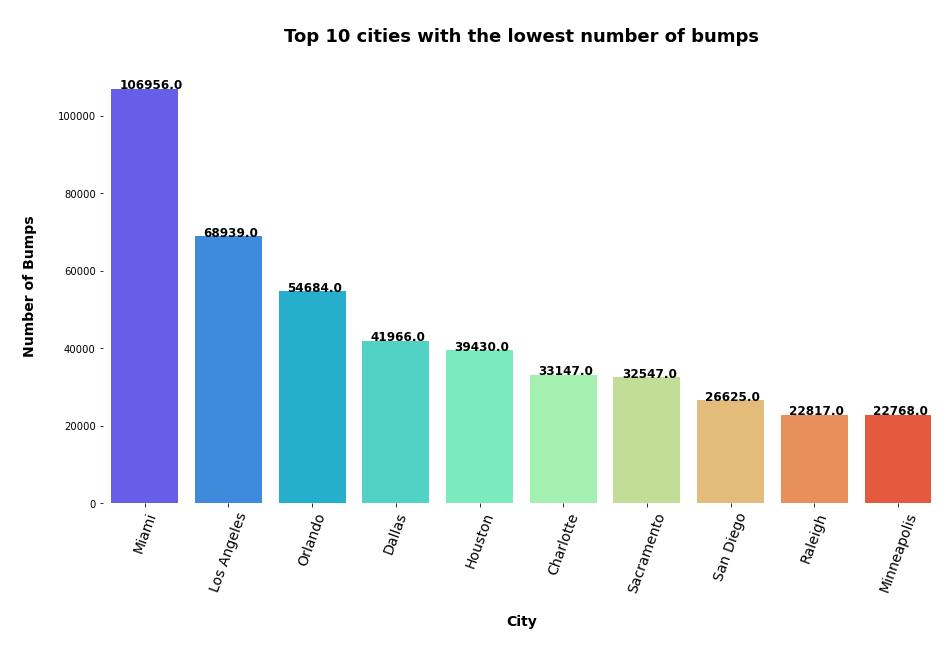

In [209]:
fig, ax = plt.subplots(figsize=(15,8))
sns.barplot(x=city_nobump.City, y=city_nobump.Count, palette='rainbow');    
for i in ax.patches:
    ax.text(i.get_x()+.1, i.get_height()+5, str(i.get_height()), 
            fontsize = 12, weight= 'bold', color='black')
for a in ['right' , 'left', 'top', 'bottom']:
    ax.spines[a].set_visible(False)

plt.xticks(rotation=70, fontsize=14)
plt.xlabel(f'\nCity\n', fontsize=14, weight='bold')
plt.ylabel(f'\nNumber of Bumps\n', fontsize=14, weight='bold')
plt.title(f'\nTop 10 cities with the lowest number of bumps\n', fontsize=18, weight='bold')
plt.show();

Obvisiouly from the figure above, Miami has the least number of bumps which resulted to higher number of accident cases.

**Q: Accident cases at an area with junctions and a traffic signals / no traffic signal, and at an area with no junctions but with traffic signals / no trafficc signals**

In [242]:
city_junction = data.groupby('Junction')['Traffic_Signal'].value_counts()*100/data.shape[0]

In [243]:
city_junction

Junction  Traffic_Signal
False     False             80.572915
          True               9.217240
True      False             10.104374
          True               0.105471
Name: Traffic_Signal, dtype: float64

At an area with junctions and traffic signals, there's a lesser accidents compare to junctions with no traffic signals. Traffic signals regulate the movement of people on the road to limit road harzard which is understable why accident cases is minimal at an area with traffic signal.

The same thing is applied to an area with no junctions, traffic signal existence reduces the number of accidents on the road. 80% of the accidents cases happened at an area with neither junction nor traffic signal while, 10% happened at an area with junctions but no traffic signals.

# Conclusion from the analysis

**The following deductions were gotten from the analysis;**
- Miami has the highest cases of accidents among cities in the US which can be related to the number of bumps in the city. There's a low number of bumps across the city and relatively, one of the major solutions to reduce the number of accident cases is to increase the number of bumps across the city.

- Among th states in US, the California has the highest recoreded case of accidents. Three out of the top 10 cities with highest number of accident cases are from California.

- An  area with higher latitude and smaller longitude are more prone to accidents. Over the years, there are higher number of accidents cases in that kind of area.

- There are more accidents at the Eastern Timezone in US, It is convicing enough as it is the most populous region with nearly half of the country's population.

- The number of accidents is very high around 3pm-7pm (extremely high at 6pm, probably because of people rushing down home after work).Other than the mentioned time range, there is a high number of accident between 7am-9am (Within this time range is also refer to as rush-hour, as people will be rushing down to their respective workplace).

- There are more accident during the weekdays compare to weekends. There's a gradual increment in number of the accident per day (through the workingdays) in which the peak is on Friday as it is the last day of working days (probably due to how intense work could get through the week). On weekends, there are lesser people on the road as many will be resting at home before the new week started. Over 17% of the recorded accidents happened on Friday.

- December has the largest percentage (16.66% of accident cases among other months of the year. Over 16% of the recorded accidents happened on December.

- There are more accidents between 30F-100F (highest at over 70F). Temperature between the range is still endurable by human at least from 50F to 100F but as the temperature increases or decreases, it becomes more uncomfortable which might even cause some accidents but if the decrement or increamnet gotten worse, many people will be home regulating the temperature which as a result limit the number of people on the road. There are more accidents at the endurable temperature and this is telling us the relationship between population and road accident; it is of course, Linear.

- The effects of visibility on the number of accidents is not Linear but the area with higher (large) visibility value tend to have low number of accidents. There are high number of accidents at the visiblity value of 10mi but very low at any value above it.

- There are more accident cases at an area with no junctions,this is mainly due to the fact that; traffic signal is mostly common at every junction today which monitor and guide peoole movement on the road. 80% of the accidents cases happened at an area with neither junction nor traffic signal while, 10% happened at an area with junctions but no traffic signals.

- Fair-Weather means moderate weather; suitable for outdoor activities. From the analysis, it can be seen that, there are more accidents in Fair-Weather as there are many people outside working or on the road. So, we can also conclude that the number of people on the road depend on the weather condition and accident cases is linearly dependent on the number of people on the road.

- Area with bumps have a lower rate of accidents as its work is to limit speed. Over 99% of the recorded accidents happened at an area without Bumps.

- There are less accident in an area with traffic signal while there are more accidents at an area with no traffic signal. 90.68% of the accidents happened at an area with no traffic signal.

- Over the years (from 2016-2021), accident cases has increased drastically. In 2016, the number of accident cases recorded daily is 334 while in 2021, 4141 accident cases were recorded daily! Which is like a twelve times of 2016. 
- Over 53.13% of the recorded accidents happened in 2021.

# THANK YOU FOR YOUR TIME.🙂👨‍💻